<a href="https://colab.research.google.com/github/vinalyan/pytonDS/blob/lession--5/Kozhemyakin_Vitaliy_Kurs_PythonDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

* `Id` - идентификационный номер квартиры
* `DistrictId` - идентификационный номер района
* `Rooms` - количество комнат
* `Square` - площадь
* `LifeSquare` - жилая площадь
* `KitchenSquare` - площадь кухни
* `Floor` - этаж
* `HouseFloor` - количество этажей в доме
* `HouseYear` - год постройки дома
* `Ecology_1, Ecology_2, Ecology_3` - экологические показатели местности
* `Social_1, Social_2, Social_3` - социальные показатели местности
* `Healthcare_1, Helthcare_2` - показатели местности, связанные с охраной здоровья
* `Shops_1, Shops_2` - показатели, связанные с наличием магазинов, торговых центров
* `Price` - цена квартиры

In [230]:
df = pd.read_csv('/content/sample_data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Посмотрим на значения в колонках 
* Ecology_2
* Ecology_3      
* Shops_2 

In [231]:
df['Ecology_3'].unique(), df['Ecology_2'].unique(), df['Shops_2'].unique()

(array(['B', 'A'], dtype=object),
 array(['B', 'A'], dtype=object),
 array(['B', 'A'], dtype=object))

Видно, что это категориальные данные. Преобразуем из в циферки. 

In [232]:
df.Ecology_2 = df.Ecology_2.replace('A', 0)
df.Ecology_2 = df.Ecology_2.replace('B', 1)

df.Ecology_3 = df.Ecology_3.replace('A', 0)
df.Ecology_3 = df.Ecology_3.replace('B', 1)

df.Shops_2 = df.Shops_2.replace('A', 0)
df.Shops_2 = df.Shops_2.replace('B', 1)


In [233]:
df['Ecology_3'].unique(), df['Ecology_2'].unique(), df['Shops_2'].unique()

(array([1, 0]), array([1, 0]), array([1, 0]))

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [235]:
df['Healthcare_1'].describe()

count    5202.000000
mean     1142.904460
std      1021.517264
min         0.000000
25%       350.000000
50%       900.000000
75%      1548.000000
max      4849.000000
Name: Healthcare_1, dtype: float64

In [236]:
df.LifeSquare.describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

Семь тысяч квадратных метров, что-то очень большая квартира

In [237]:
df[df.LifeSquare > 2000]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8000,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,1,1,2,469,0,NaN,0,0,1,217357.492366


Тут явнавя ошибка. Скорее всего надо жизненное пространстро поделить на 100

In [238]:
df.LifeSquare[8000] = df.LifeSquare[8000] / 100
df[df.LifeSquare > 2000]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [239]:
df[df.Id == 16550]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8000,16550,27,3.0,81.694417,74.805921,1.0,9,17.0,2016,0.017647,1,1,2,469,0,NaN,0,0,1,217357.492366


In [240]:
LF = df.LifeSquare[df.LifeSquare.isna() == False]
LF.describe()

count    7887.000000
mean       36.260658
std        20.278485
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max       638.163193
Name: LifeSquare, dtype: float64

In [241]:
df[df.LifeSquare > 450]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
5183,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,1,1,52,11217,1,2300.0,1,7,1,394253.299978
9229,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,1,1,22,6398,141,1046.0,3,23,1,133529.681562


In [242]:
df.LifeSquare[5183] = df.LifeSquare[5183] / 10
df.Square[9229] = df.Square[9229] / 10
df.LifeSquare[9229] = df.LifeSquare[9229] / 10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [249]:
df[df.LifeSquare > 140]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
357,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,1,1,6,1437,3,NaN,0,2,1,141780.231857
730,14181,62,3.0,156.636577,153.685835,1.0,1,3.0,2005,0.072158,1,1,2,629,1,NaN,0,0,0,502523.573863
1776,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,1,1,53,14892,4,NaN,1,4,1,528560.506016
1906,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,1,0,31,7010,5,4508.0,3,7,1,455264.882666
3204,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,1,1,2,475,0,NaN,0,0,1,207007.956663
5283,11055,151,1.0,174.649522,174.837082,15.0,10,12.0,1958,0.236108,1,1,16,3893,27,NaN,3,10,1,232766.187698
5712,8961,27,1.0,33.398983,164.153360,6.0,3,5.0,1965,0.211401,1,1,9,1892,0,NaN,0,1,1,104891.073757
6030,15362,23,1.0,163.286965,161.155275,1.0,4,3.0,1977,0.014073,1,1,2,475,0,NaN,0,0,1,228572.520347
6450,2603,30,3.0,162.587886,164.526757,0.0,2,3.0,1977,0.000078,1,1,22,6398,141,1046.0,3,23,1,207407.352593
7010,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,1,1,26,3889,6,705.0,3,6,1,90470.430830


In [244]:
df[df.LifeSquare > df.Square]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
33,847,74,2.0,73.314975,74.131261,1.0,7,6.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1,254005.381863
64,3992,1,3.0,87.200625,87.730225,0.0,21,22.0,1977,0.007122,1,1,1,264,0,NaN,0,1,1,300180.365669
77,11771,45,1.0,38.467276,39.624493,1.0,11,9.0,1977,0.195781,1,1,23,5212,6,NaN,3,2,1,247440.530601
100,13343,74,2.0,79.937665,82.931595,1.0,8,21.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1,226808.747168
111,13875,20,1.0,28.438794,32.514021,6.0,6,10.0,2014,0.019509,1,1,37,7687,11,176.0,5,5,1,199248.114376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,1,1,46,9515,5,NaN,1,10,1,524365.550705
9962,14175,14,1.0,42.029175,44.682167,10.0,4,4.0,2018,0.238617,1,1,26,3889,6,705.0,3,6,1,87556.385617
9979,2201,6,1.0,40.043234,41.984322,1.0,3,17.0,2014,0.243205,1,1,5,1564,0,540.0,0,0,1,134888.083598
9987,11665,1,2.0,62.690057,64.602939,10.0,19,22.0,2018,0.007122,1,1,1,264,0,NaN,0,1,1,203908.192698


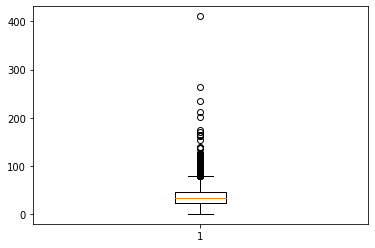

In [245]:
LF = df.LifeSquare[df.LifeSquare.isna() == False]
plt.boxplot(LF)

plt.show()

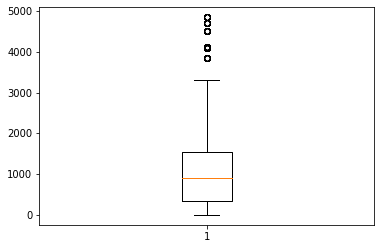

In [196]:
plt.boxplot(df.Healthcare_1[df.Healthcare_1.isna() == False])
plt.show()

In [259]:
df_1 = df[df.LifeSquare.isna() == False]

In [261]:
df_1 = df_1[df.Healthcare_1.isna() == False]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [262]:
df_1

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1183.0,1,0,1,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,240.0,3,1,1,282078.720850
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,1,1,35,5776,1,2078.0,2,4,1,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,1,1,24,4860,1,80.0,0,3,1,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,1,1,37,7687,11,176.0,5,5,1,326174.175191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,729,58,2.0,45.118604,33.759011,5.0,8,12.0,1968,0.050756,1,1,24,5469,1,145.0,0,1,1,227361.501595
9990,10635,21,1.0,18.983962,11.419796,2.0,1,5.0,1967,0.194489,1,1,47,8004,3,125.0,3,5,1,112411.221700
9992,11753,37,2.0,50.902724,27.159548,6.0,4,9.0,1972,0.127812,1,1,28,7287,5,320.0,1,3,1,196641.468817
9994,4356,9,1.0,43.303458,21.519087,8.0,12,14.0,1992,0.161532,1,1,25,5648,1,30.0,2,4,1,136744.340827


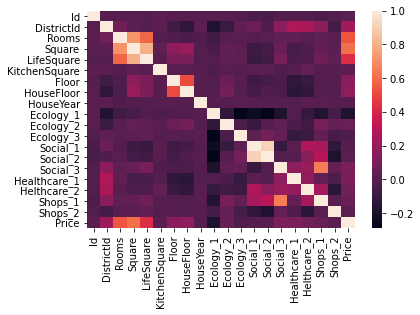

In [263]:
sns.heatmap(df_1.corr());


In [286]:
X = df_1[['Rooms', 'DistrictId']]
y = df_1['Price']

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [288]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#линейная регрессия

model_lr = LinearRegression().fit(X_train, y_train)

#L2 регуляризация
model_rige = Ridge(alpha=1.0)
model_rige.fit(X_train, y_train)

#L1 - регуляризация
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train, y_train)

#Деревья

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [290]:
print('R2')
print(f'LR_train {r2_score(model_lr.predict(X_train),y_train)}')
print(f'L1_train {r2_score(model_lasso.predict(X_train),y_train)}')
print(f'L2_train {r2_score(model_rige.predict(X_train),y_train)}')

print(f'LR_test {r2_score(model_lr.predict(X_test),y_test)}')
print(f'L1_test {r2_score(model_lasso.predict(X_test),y_test)}')
print(f'L2_test {r2_score(model_rige.predict(X_test),y_test)}')


R2
LR_train -0.8798068709402294
L1_train -0.8798809141843609
L2_train -0.8813385183628848
LR_test -1.2772830048784067
L1_test -1.277372665450553
L2_test -1.279140617056726


In [295]:
df.DistrictId.unique()

array([ 27,  22,   1,  94,  99,  44,  59,   6,   2,  88,  93,  90,  36,
        96,  48,   8,  45,  63,  20,   7, 103,  67,  24,  23,  38, 100,
        74,  35,   9, 167, 119, 129,   4,  62, 173,  37,  60, 111, 124,
       157, 138, 147,  66,  42,  41,  58,  75,  81, 110,   5,  57,  77,
        11,  61, 120, 121, 101,  32,  21, 140,  46,  91,  30,   0,  33,
        85,  17,  56,  84, 137, 143,  31,  53, 163, 200,  78, 182,  73,
        70,  98,  54,  55,   3, 159,  50,  49,  52, 127,  28,  83,  29,
       194,  47, 128,  12, 187,  80, 170,  34, 205,  79, 105, 123,  39,
       142, 176, 130,  13,  15,  25,  89, 169, 113, 108, 132, 186, 106,
        10, 139, 151, 144,  69, 189, 152, 125, 109,  40, 162,  72, 154,
        64,  26,  18, 164,  71,  82,  86, 155, 122, 112, 126, 166, 117,
       116,  95,  87,  92, 168, 136, 165, 150,  68, 191, 145,  43, 188,
       193, 146, 104,  51, 158,  97, 153, 161, 149, 107, 177, 118, 114,
       156, 160,  14,  19, 135, 148, 131, 134, 183, 185, 190, 14

In [307]:
df.Healthcare_1[df.DistrictId == 1]

2       240.0
3         NaN
8         NaN
18        NaN
47        NaN
        ...  
9968      NaN
9978      NaN
9983      NaN
9987      NaN
9993      NaN
Name: Healthcare_1, Length: 652, dtype: float64

In [302]:
df[df.DistrictId == 2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 10 to 9986
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             78 non-null     int64  
 1   DistrictId     78 non-null     int64  
 2   Rooms          78 non-null     float64
 3   Square         78 non-null     float64
 4   LifeSquare     78 non-null     float64
 5   KitchenSquare  78 non-null     float64
 6   Floor          78 non-null     int64  
 7   HouseFloor     78 non-null     float64
 8   HouseYear      78 non-null     int64  
 9   Ecology_1      78 non-null     float64
 10  Ecology_2      78 non-null     int64  
 11  Ecology_3      78 non-null     int64  
 12  Social_1       78 non-null     int64  
 13  Social_2       78 non-null     int64  
 14  Social_3       78 non-null     int64  
 15  Healthcare_1   59 non-null     float64
 16  Helthcare_2    78 non-null     int64  
 17  Shops_1        78 non-null     int64  
 18  Shops_2  

In [342]:
df[['Healthcare_1','Helthcare_2']][df.DistrictId == 2]

,Healthcare_1,Helthcare_2
10,2620.0,0
156,990.0,0
230,990.0,0
472,990.0,0
537,990.0,0
...,...,...
9342,990.0,0
9526,NaN,2
9557,900.0,1
9896,2620.0,0


In [329]:
df[['Healthcare_1','Helthcare_2']][df.DistrictId == 3]

,Healthcare_1,Helthcare_2
185,30.0,2
325,30.0,2
379,30.0,2
694,1937.0,3
695,30.0,2
...,...,...
9732,30.0,2
9840,1937.0,3
9845,1937.0,3
9884,30.0,2
